# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 16.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
275279,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.0024,0.0024,0,0,0,0
336927,0.6592,0.1733,0.0342,0.0366,0.0049,0.0757,0.4077,1.3232,0.0391,0.2490,3,3,11,11
79853,0.1953,0.0024,0.0024,0.0024,0.0024,0.0024,0.0195,0.3223,0.0024,0.0537,5,0,10,0
399124,0.5786,0.0439,0.0024,0.0024,0.0098,0.0342,0.1685,0.5322,0.0024,0.0684,1,0,18,0
154990,0.2686,0.0024,0.0024,0.0024,0.0024,0.0024,0.0171,0.2124,0.0024,0.0146,0,0,0,0


In [3]:
raw_data.shape

(456828, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456828 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456828 non-null  float64
 1   Emg2          456828 non-null  float64
 2   Emg3          456828 non-null  float64
 3   Emg4          456828 non-null  float64
 4   Emg5          456828 non-null  float64
 5   Emg6          456828 non-null  float64
 6   Emg7          456828 non-null  float64
 7   Emg8          456828 non-null  float64
 8   Emg9          456828 non-null  float64
 9   Emg10         456828 non-null  float64
 10  repetition    456828 non-null  int64  
 11  rerepetition  456828 non-null  int64  
 12  stimulus      456828 non-null  int64  
 13  restimulus    456828 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000
mean,0.257678,0.095188,0.119775,0.024560,0.010445,0.027816,0.279186,0.355002,0.052767,0.148996,3.225945,2.036832,5.718159,3.720632
std,0.284347,0.215564,0.396491,0.095231,0.049478,0.072824,0.493694,0.423499,0.179540,0.277385,3.489114,3.183046,6.596319,6.126775
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019500,0.002400,0.002400,0.002400,0.002400,0.002400,0.029300,0.102500,0.002400,0.007300,0.000000,0.000000,0.000000,0.000000
50%,0.178200,0.002400,0.002400,0.002400,0.002400,0.002400,0.117200,0.231900,0.002400,0.053700,2.000000,0.000000,3.000000,0.000000
75%,0.405300,0.058600,0.009800,0.002400,0.002400,0.022000,0.310100,0.434600,0.004900,0.158700,6.000000,4.000000,10.000000,6.000000
max,3.393600,2.702600,4.658200,2.480500,4.660600,2.163100,4.663100,4.665500,3.867200,3.930700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188839
8      15501
2      15495
12     15493
4      15490
7      15483
1      15467
6      15464
9      15456
11     15453
5      15449
3      15405
10     15405
14     10334
13     10332
17     10327
15     10285
16     10257
21      5181
18      5170
19      5162
22      5130
20      5125
23      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

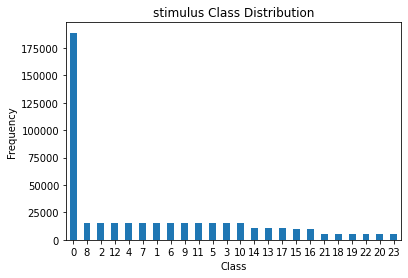

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
101806,0.4956,0.4443,0.2441,0.0391,0.0171,0.0244,0.2734,1.0815,0.0708,0.1855,1,1,1,1
308639,0.2368,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1514,0.0024,0.0024,0,0,0,0
430145,0.0952,0.0049,0.0024,0.0024,0.0024,0.0146,0.0464,0.4443,0.0342,0.0171,3,3,21,21
31426,0.3247,0.0024,0.0024,0.0024,0.0024,0.0049,0.1685,0.2832,0.0024,0.1123,0,0,0,0
314840,0.0024,0.0024,0.0024,0.0024,0.0024,0.0488,0.0073,0.0269,0.0024,0.0269,8,8,8,8


In [12]:
raw_data.shape

(352081, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352081 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          352081 non-null  float64
 1   Emg2          352081 non-null  float64
 2   Emg3          352081 non-null  float64
 3   Emg4          352081 non-null  float64
 4   Emg5          352081 non-null  float64
 5   Emg6          352081 non-null  float64
 6   Emg7          352081 non-null  float64
 7   Emg8          352081 non-null  float64
 8   Emg9          352081 non-null  float64
 9   Emg10         352081 non-null  float64
 10  repetition    352081 non-null  int64  
 11  rerepetition  352081 non-null  int64  
 12  stimulus      352081 non-null  int64  
 13  restimulus    352081 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 40.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 83.02114546203332


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     37336
           1       0.79      0.78      0.78      2041
           2       0.75      0.76      0.75      1801
           3       0.75      0.76      0.76      1808
           4       0.79      0.78      0.78      1649
           5       0.68      0.70      0.69      1852
           6       0.74      0.75      0.74      1782
           7       0.63      0.63      0.63      2039
           8       0.58      0.61      0.60      1792
           9       0.65      0.65      0.65      1670
          10       0.72      0.73      0.73      1657
          11       0.70      0.71      0.70      1863
          12       0.72      0.70      0.71      1955
          13       0.77      0.76      0.76      1339
          14       0.70      0.68      0.69      1283
          15       0.78      0.78      0.78      1165
          16       0.76      0.76      0.76      1370
 

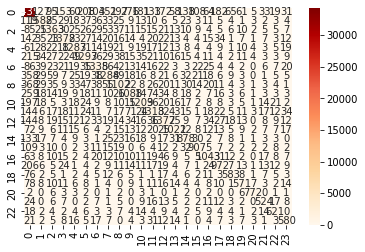

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.318957070025704
MSE: 14.779485067526307
RMSE: 3.8444095863378434


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8307591531969384
Recall Score :  0.8302114546203332
f1_score :  0.8304358554277065


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 89.06088018518255


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     37336
           1       0.89      0.88      0.88      2041
           2       0.90      0.87      0.88      1801
           3       0.88      0.83      0.85      1808
           4       0.90      0.89      0.90      1649
           5       0.80      0.80      0.80      1852
           6       0.88      0.87      0.88      1782
           7       0.75      0.75      0.75      2039
           8       0.77      0.74      0.75      1792
           9       0.76      0.75      0.76      1670
          10       0.85      0.82      0.83      1657
          11       0.86      0.84      0.85      1863
          12       0.84      0.82      0.83      1955
          13       0.90      0.89      0.90      1339
          14       0.83      0.78      0.81      1283
          15       0.88      0.85      0.87      1165
          16       0.93      0.90      0.91      1370
 

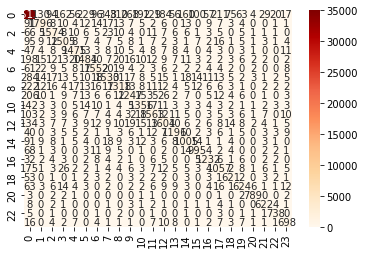

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.9166110456281864
MSE: 10.580215004899385
RMSE: 3.2527242435994146


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8899960885409804
Recall Score :  0.8906088018518256
f1_score :  0.8901483089169101


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.42536603377025


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37336
           1       0.93      0.87      0.90      2041
           2       0.94      0.87      0.91      1801
           3       0.94      0.83      0.88      1808
           4       0.95      0.89      0.92      1649
           5       0.90      0.79      0.84      1852
           6       0.91      0.88      0.89      1782
           7       0.87      0.73      0.80      2039
           8       0.89      0.70      0.79      1792
           9       0.89      0.73      0.80      1670
          10       0.94      0.83      0.88      1657
          11       0.91      0.83      0.87      1863
          12       0.91      0.83      0.86      1955
          13       0.94      0.88      0.91      1339
          14       0.88      0.80      0.83      1283
          15       0.93      0.83      0.88      1165
          16       0.95      0.88      0.91      1370
 

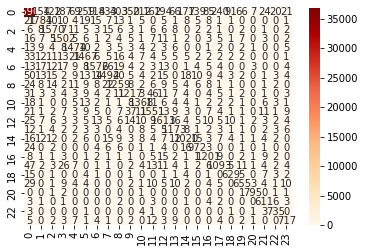

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7104392405243052
MSE: 8.21180964823835
RMSE: 2.8656255247743645


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9142312130646647
Recall Score :  0.9142536603377025
f1_score :  0.9120810087077749


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[22:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.42276722950425


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37336
           1       0.90      0.87      0.88      2041
           2       0.91      0.85      0.88      1801
           3       0.90      0.83      0.87      1808
           4       0.91      0.89      0.90      1649
           5       0.86      0.79      0.82      1852
           6       0.88      0.87      0.87      1782
           7       0.81      0.72      0.77      2039
           8       0.85      0.71      0.77      1792
           9       0.84      0.73      0.78      1670
          10       0.89      0.83      0.86      1657
          11       0.86      0.82      0.84      1863
          12       0.87      0.81      0.84      1955
          13       0.89      0.86      0.88      1339
          14       0.84      0.80      0.82      1283
          15       0.90      0.84      0.87      1165
          16       0.93      0.86      0.89      1370
 

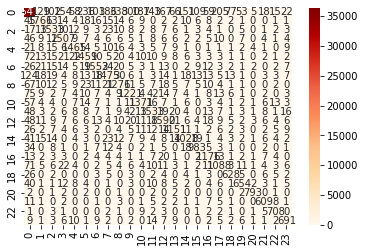

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.7732649786273201
MSE: 8.80053112174617
RMSE: 2.966568914039613


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9026486275823354
Recall Score :  0.9042276722950424
f1_score :  0.9024300254256034


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.76761293437664


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37336
           1       0.95      0.88      0.91      2041
           2       0.95      0.88      0.91      1801
           3       0.95      0.83      0.88      1808
           4       0.95      0.90      0.93      1649
           5       0.92      0.80      0.86      1852
           6       0.92      0.89      0.90      1782
           7       0.88      0.75      0.81      2039
           8       0.92      0.71      0.80      1792
           9       0.91      0.73      0.81      1670
          10       0.93      0.83      0.88      1657
          11       0.93      0.85      0.89      1863
          12       0.92      0.83      0.87      1955
          13       0.97      0.89      0.93      1339
          14       0.90      0.79      0.84      1283
          15       0.95      0.85      0.90      1165
          16       0.96      0.88      0.92      1370
 

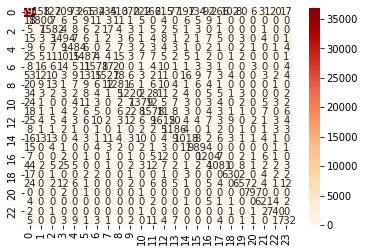

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.708791911044208
MSE: 8.344192453526848
RMSE: 2.8886315884042477


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9185999264556102
Recall Score :  0.9176761293437664
f1_score :  0.9156530065411954
